In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X,y=make_regression(n_samples=4,n_features=1,n_targets=1,noise=80,random_state=13)

#We are creating a small dataset using make regression function, which is a sort of linear
#Input columns are also known as features

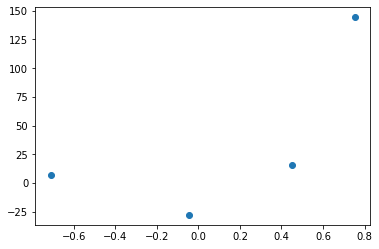

In [3]:
plt.scatter(X,y)

In [4]:
#Lets apply OLS- Ordinary least square
from sklearn.linear_model import LinearRegression

In [5]:
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [6]:
lr.coef_

array([78.35063668])

In [7]:
lr.intercept_

26.15963284313262

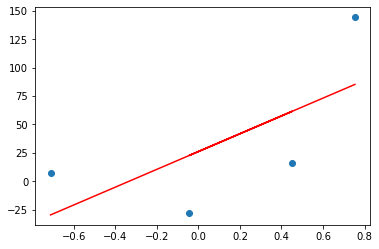

In [8]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red')

In [9]:
#Lets apply gradient descend assuming that slope is constant at m=78.35
#Lets assume the starting point for intercept b=0
y_pred=((78.35*X)+0).reshape(4)

In [10]:
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

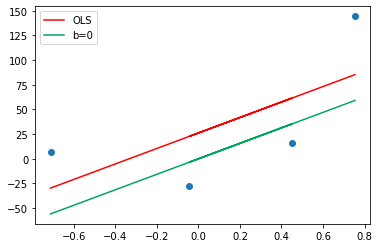

In [11]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b=0')
plt.legend()
plt.show()

In [12]:
m=78.35
b=0

loss_slope_wrt_b=-2 * np.sum(y- m*X.ravel() - b)
loss_slope_wrt_b

-209.27763408209216

In [13]:
#Lets take learning rate=0.1
lrate=0.1

step_size=loss_slope_wrt_b*lrate
step_size

-20.927763408209216

In [14]:
#calculating the new intercept
b=b-step_size
b

20.927763408209216

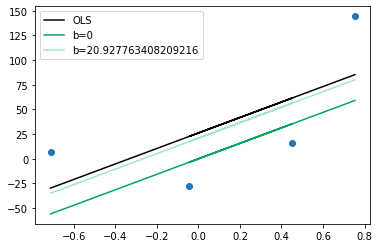

In [15]:
y_pred1=((78.35*X)+b).reshape(4)

plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='black',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b=0')
plt.plot(X,y_pred1,color='#A3E4D7',label='b={}'.format(b))
plt.legend()
plt.show()

In [16]:
#Iteration 2
m=78.35
b=20.927763408209216

loss_slope_wrt_b=-2 * np.sum(y- m*X.ravel() - b)
loss_slope_wrt_b

-41.85552681641843

In [17]:
step_size=loss_slope_wrt_b*lrate
step_size

-4.185552681641844

In [18]:
b=b-step_size
b

25.11331608985106

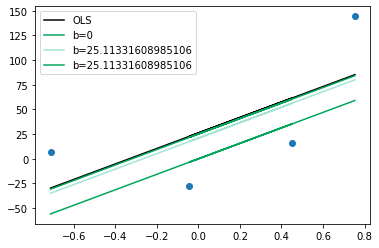

In [19]:
y_pred2=((78.35*X)+b).reshape(4)

plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='black',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b=0')
plt.plot(X,y_pred1,color='#A3E4D7',label='b={}'.format(b))
plt.plot(X,y_pred2,color='#00a65a',label='b={}'.format(b))
plt.legend()
plt.show()

In [20]:
#Iteration 3
#b=25.11331608985106

loss_slope_wrt_b=-2 * np.sum(y- m*X.ravel() - b)
loss_slope_wrt_b

-8.371105363283675

In [21]:
step_size=loss_slope_wrt_b*lrate
step_size

-0.8371105363283675

In [22]:
b=b-step_size
b

25.95042662617943

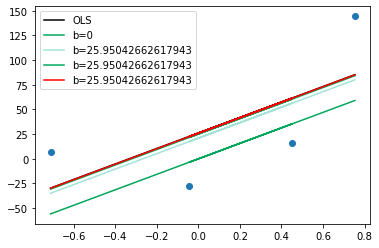

In [23]:
y_pred3=((78.35*X)+b).reshape(4)

plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='black',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b=0')
plt.plot(X,y_pred1,color='#A3E4D7',label='b={}'.format(b))
plt.plot(X,y_pred2,color='#00a65a',label='b={}'.format(b))
plt.plot(X,y_pred3,color='red',label='b={}'.format(b))
plt.legend()
plt.show()

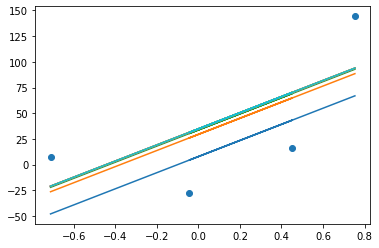

In [24]:
#We are now putting this entire thing into a loop

b=-100
m=78.35
lr=0.1

epochs=10

for i in range(epochs):
    loss_slope=-2 * np.sum(y-X.ravel() - b)
    b= b - (lr * loss_slope)
    
    y_pred= m * X + b
    
    plt.plot(X,y_pred)
    
plt.scatter(X,y)

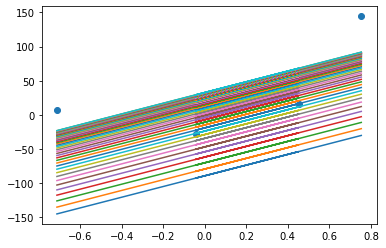

In [25]:
#We are reducing the learning rate

b=-100
m=78.35
lr=0.01

epochs=50

for i in range(epochs):
    loss_slope=-2 * np.sum(y-X.ravel() - b)
    b= b - (lr * loss_slope)
    
    y_pred= m * X + b
    
    plt.plot(X,y_pred)
    
plt.scatter(X,y)

#If we keep the learning rate low, then we have to increase the iterations too. Otherwise we might not reach the exact line

#### Making a class to perform Gradient Descend

In [94]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [78]:
X,y=make_regression(n_samples=100, n_features=1,n_informative=1, n_targets=1,noise=20)

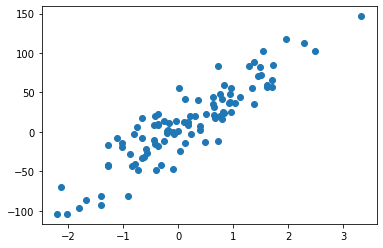

In [79]:
plt.scatter(X,y)

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lr=LinearRegression()

In [82]:
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[42.72340718]
4.379495936814803


In [95]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

0.7662601259938434

In [73]:
m=42.72340718


In [108]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m=100
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs
        
    def fit(self,X,y):
        #Calculate the b using GD
        for i in range(self.epochs):
            loss_slope_wrt_b= -2 * np.sum(y- self.m * X.ravel() - self.b)
            loss_slope_wrt_m= -2 * np.sum((y- self.m * X.ravel() - self.b) * X.ravel())
            
            self.b= self.b - (self.lr * loss_slope_wrt_b)
            self.m= self.m - (self.lr * loss_slope_wrt_m)
            print(loss_slope,self.b,self.m)
        print(self.b)
        print(self.m)
        
    def predict(self,X):
        return self.m * X + self.b

In [109]:
gd=GDRegressor(0.001,50)

In [110]:
gd.fit(X,y)

-18.134261350306502 -96.97007689442249 91.05404505353795
-18.134261350306502 -78.25781785795985 83.38921707349074
-18.134261350306502 -63.04097971398829 76.85491031747178
-18.134261350306502 -50.65691402567283 71.30808227280725
-18.134261350306502 -40.57089190449823 66.6166866374675
-18.134261350306502 -32.35087449916192 62.661308977900276
-18.134261350306502 -25.64738210255511 59.33561931425214
-18.134261350306502 -20.177404023786153 56.54607353996073
-18.134261350306502 -15.711516862805475 54.211163801923405
-18.134261350306502 -12.063554970493238 52.260423259713306
-18.134261350306502 -9.082314740961781 50.63332303222688
-18.134261350306502 -6.644882494922175 49.278151265087324
-18.134261350306502 -4.65126065966914 48.150930689628055
-18.134261350306502 -3.0200338269116838 47.21440781057842
-18.134261350306502 -1.684869021412735 46.43713103612788
-18.134261350306502 -0.5916862048135112 45.792624519629555
-18.134261350306502 0.30363194768924695 45.25865766636293
-18.134261350306502 1

In [111]:
gd.predict(X)

array([[-1.96131815e+01],
       [-3.14295406e+01],
       [ 3.32532187e+01],
       [ 7.83901712e+01],
       [-6.79015238e+00],
       [ 3.92093465e+01],
       [ 4.49352889e+01],
       [-8.71385361e+01],
       [-3.90402655e+01],
       [-2.35682178e+01],
       [-1.14272426e+01],
       [ 2.48635654e+01],
       [ 6.03384514e+00],
       [ 1.30648019e+00],
       [-5.02407016e+01],
       [ 1.23496809e+01],
       [ 5.37014461e+00],
       [-2.40223944e+01],
       [ 7.72330687e+01],
       [ 6.10519972e-01],
       [ 3.51572882e+01],
       [ 9.44333385e+00],
       [ 4.47922442e+01],
       [-1.15189863e+01],
       [ 3.13781998e+01],
       [ 1.46390377e+01],
       [ 5.20745384e+01],
       [-3.15600354e+00],
       [ 1.02556330e+02],
       [ 9.19207128e-02],
       [ 8.78549273e+01],
       [ 7.01553123e+01],
       [ 2.13857303e+01],
       [-9.21171275e+00],
       [-4.34326175e+01],
       [ 4.50904327e+01],
       [-4.23791909e+00],
       [ 3.52982860e+01],
       [ 7.3